# Data Science Final Project
Charles Laurent, Jenny Park, AJ Marino

## Sandbox

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import metrics

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))

pd.set_option('display.max_columns', None)

In [3]:
# TODO - Update path to files
datadir='../dev/project/CollegeScorecard_Raw_Data'

# TODO set features_dir 
features_dir = './data'


In [4]:
# import collegedatalib
import collegedatahelper

In [5]:
%%time
data_dict = collegedatahelper.create_data_dict_full(datadir)

CPU times: user 1min 47s, sys: 14.3 s, total: 2min 1s
Wall time: 2min 6s


In [6]:
df = data_dict['2012_13']
df_13 = data_dict['2013_14']
df_new = data_dict['2017_18']

In [30]:
def getNyuDTI(df):
    nyu = df[df['INSTNM'] == 'New York University']
#     print(nyu['debt_to_income'].shape[0])
    if nyu['debt_to_income'].shape[0]:
        return nyu['debt_to_income'].values[0]
    else:
        return np.nan

In [31]:
getNyuDTI(df)

0.43333333333333335

In [90]:
nyu_data = {
    'year': [],
    'debt_to_income': []
}

for year in collegedatahelper.years_train_all:
    dti = getNyuDTI(data_dict[year])
#     if dti:
    nyu_data['year'].append(year)
    nyu_data['debt_to_income'].append(dti)
    
for year in collegedatahelper.years_test:
    nyu_data['year'].append(year)
    nyu_data['debt_to_income'].append(np.nan)

    

In [91]:
df_nyu

,year,debt_to_income
0,2003_04,0.331573
1,2004_05,NaN
2,2005_06,0.323761
3,2006_07,NaN
4,2007_08,0.303270
5,2008_09,NaN
6,2009_10,0.354152
7,2010_11,NaN
8,2011_12,0.433525
9,2012_13,0.433333


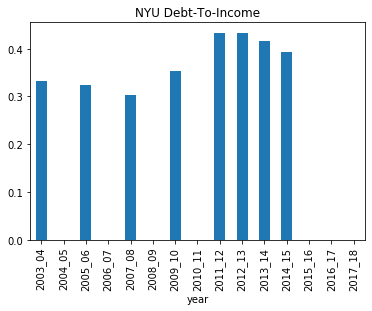

In [92]:
df_nyu = pd.DataFrame(nyu_data)

ax = df_nyu.plot.bar(
    x='year',
    y='debt_to_income',
    title='NYU Debt-To-Income',
    legend=False
)

In [93]:
df_nyu_pred = df_nyu.copy()
df_nyu_pred['prediction'] = df_nyu_pred['debt_to_income']

mean = df_nyu_pred['debt_to_income'].mean()

df_nyu_pred['prediction'] = df_nyu_pred['prediction'].fillna(mean)
df_nyu_pred['prediction'] = df_nyu_pred['prediction'].loc[df_nyu_pred['debt_to_income'].isna()]

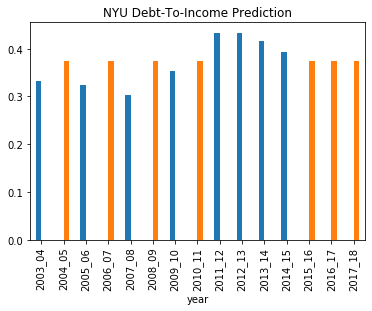

In [101]:
ax = df_nyu_pred.plot.bar(
    x='year',
    title='NYU Debt-To-Income Prediction',
    legend=False
)

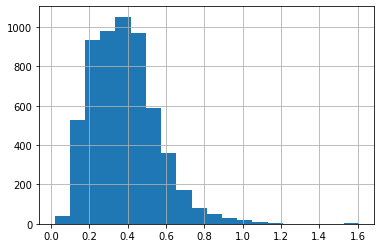

In [102]:
df['debt_to_income'].hist(bins=20)

## Debt to Income vs. School Type

In [156]:
data = {
    '1-public': df.loc[df['CONTROL'] == 1]['debt_to_income'],
    '2-private': df.loc[df['CONTROL'] == 2]['debt_to_income'],
    '3-private_profit': df.loc[df['CONTROL'] == 3]['debt_to_income']
}
df_type = pd.DataFrame(data)

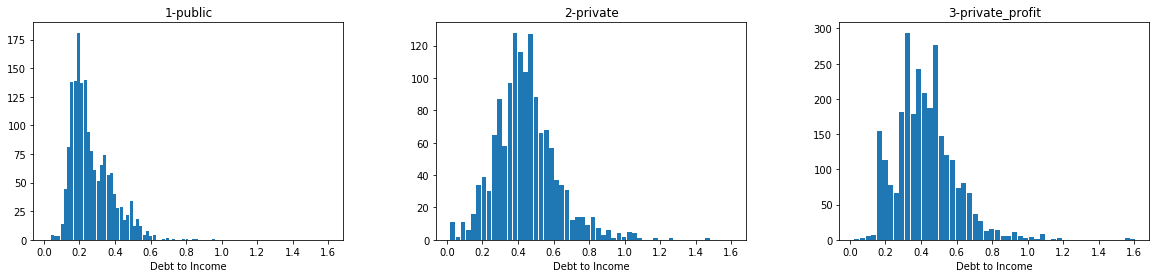

In [157]:
bins = 50
ax = df_type.hist(
    bins=bins, 
    grid=False, 
    figsize=(20,4), 
    layout=(1,3), 
    sharex=True,
#     color='#86bf91', 
#     zorder=2, 
    rwidth=0.9
)
ax = ax[0]
for x in ax:
    x.set_xlabel('Debt to Income')


## Debt Level - Household income level

In [8]:
# df.loc[df['CONTROL'] == 1]

In [10]:
# DEBT_N
# GRAD_DEBT_N
# WDRAW_DEBT_N

# LO_INC_DEBT_N
# MD_INC_DEBT_N
# HI_INC_DEBT_N

# FEMALE_DEBT_N
# MALE_DEBT_N

In [153]:
data = {
    '1-LO_INC_DEBT_N': df_pub['LO_INC_DEBT_N'],
    '2-MD_INC_DEBT_N': df_pub['MD_INC_DEBT_N'],
    '3-HI_INC_DEBT_N': df_pub['HI_INC_DEBT_N']
}
df_debt_income = pd.DataFrame(data)

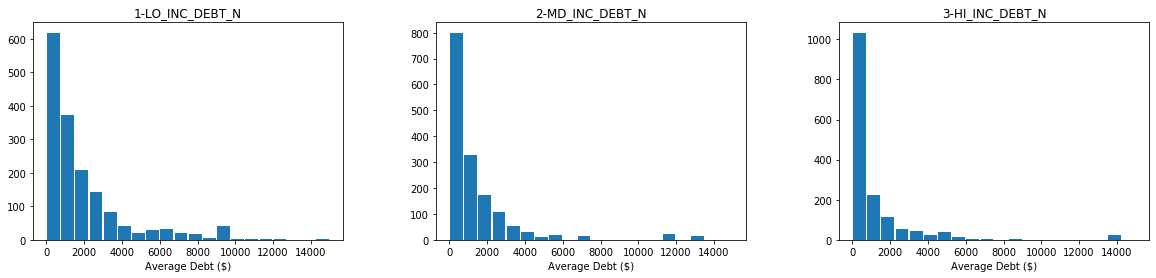

In [155]:
bins = 20
ax = df_debt_income.hist(
#     column=['LO_INC_DEBT_N', 'MD_INC_DEBT_N', 'HI_INC_DEBT_N'],
    bins=bins, 
    grid=False, 
    figsize=(20,4), 
    layout=(1,3), 
    sharex=True,
    range=(0,15000),
    rwidth=0.9
)
ax = ax[0]
for x in ax:
    x.set_xlabel('Average Debt ($)')


In [137]:
# # df_pub.hist(column='LO_INC_DEBT_N')
# # df_pub.hist(column='MD_INC_DEBT_N')
# # df_pub.hist(column='HI_INC_DEBT_N')


# data = {
#     'LO_INC_DEBT_N': df_pub['LO_INC_DEBT_N'],
#     'MD_INC_DEBT_N': df_pub['MD_INC_DEBT_N'],
#     'HI_INC_DEBT_N': df_pub['HI_INC_DEBT_N']
# }
# df_debt = pd.DataFrame(data)
# # df_debt = pd.DataFrame(
# #     [df_pub['LO_INC_DEBT_N'], 
# #     df_pub['MD_INC_DEBT_N'], 
# #     df_pub['HI_INC_DEBT_N']]
# # )

# bins = 50

# # df_debt.head()

# # df_debt.hist()
# ax = df_debt.plot.hist(bins=bins, histtype='step')


In [ ]:
df_pub.hist(column='GRAD_DEBT_N')

In [ ]:
df_pub.hist(column='WDRAW_DEBT_N')

In [ ]:
df_pub.hist(column='NPT4_PUB')

In [ ]:
df_priv.hist(column='NPT4_PRIV')

In [ ]:
df_priv_profit.hist(column='NPT4_PRIV')

In [ ]:
# train_features['DEBT_N']

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
# rf.fit(train_features, train_labels);


In [ ]:
train_labels = []

for col in df_pub.columns:
    if df_pub[col].dtypes != 'object':
        train_labels.append(col)

In [ ]:
# train_labels

In [ ]:
train_labels.remove('UNITID')
train_labels.remove('OPEID')
train_labels.remove('OPEID6')


In [ ]:
train_features = df_pub.copy()[train_labels]

In [ ]:
train_features

In [ ]:
target = train_features['DEBT_N']

# train_features_array = train_features.iloc[:, : 400]
train_features_array = train_features

In [ ]:
# Train the model on training data
rf.fit(train_features_array, target)


In [ ]:
rf.feature_importances_

In [ ]:
train_features_array.columns

In [ ]:
important_features_dict = {}
for x,i in enumerate(rf.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

# important_features_list

In [ ]:
top_features = train_features_array.columns[important_features_list]

In [ ]:
top_features[:20]

In [ ]:
features_dir = './data'

In [ ]:
# features_df = pd.read_csv(f'{features_dir}/dictionary.csv', low_memory=False)[['VARIABLE NAME', 'dev-category', 'API data type', 'NAME OF DATA ELEMENT']]
features_df = collegedatahelper.get_features_dictionary(features_dir)


In [ ]:
features_df['dev-category'].unique()

In [ ]:
# train_feature_categories = [
#     'admissions',
#     'academics',
#     'student',
#     'cost'
# ]
train_feature_categories = collegedatahelper.train_feature_categories

In [ ]:
train_features = collegedatahelper.getTrainFeatures(features_df)

len(train_features)

In [ ]:
df_blah = collegedatahelper.format_df(df, True)

df_blah_13 = collegedatahelper.format_df(df_13, True)

In [ ]:
df_blah['debt_to_income'].hist(bins=20)


In [ ]:
df_blah_13['debt_to_income'].hist(bins=20)

In [ ]:
# CONTROL 
# 1 - Public
# 2 - Private non-profit
# 3 - Private for-profit
df_pub_blah = df_blah_13.loc[df_blah_13['CONTROL'] == 1]
df_priv_blah = df_blah_13.loc[df_blah_13['CONTROL'] == 2]
df_priv_profit_blah = df_blah_13.loc[df_blah_13['CONTROL'] == 3]

In [ ]:
df_pub_blah.shape

In [ ]:
# TODO CL - should create a function for this!!!!

rows = df_pub_blah.shape[0]
df_pub_blah = df_pub_blah.dropna(axis=1, thresh=rows*0.7)

df_pub_blah = df_pub_blah.dropna(axis=0) 



In [ ]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 


In [ ]:
train_features_true = intersection(df_pub_blah.columns, train_features)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data


In [ ]:
rf2.fit(df_pub_blah[train_features_true], df_pub_blah['debt_to_income'])

In [ ]:
important_features_dict = {}
for x,i in enumerate(rf2.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

In [ ]:
top_features = train_features_array.columns[important_features_list]

In [ ]:
top_features[:20]